<a href="https://colab.research.google.com/github/CodeTunisia/InformatiqueMathsSpe-2122/blob/main/td2/TD%202%20Traitement%20d'images%20-%20corrig%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 1 : Passer de la matrice à l’image

In [1]:
import matplotlib.pyplot as plt
import numpy as np

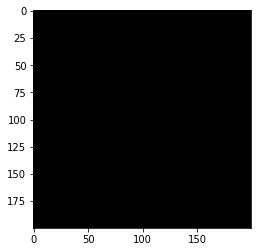

In [2]:
# Q1. creation d'une image noir
def noir(n):
    #creation d’un tableau de zeros
    M=np.zeros((n,n,3),dtype=np.uint8)
    #transformer le tableau en image
    plt.imshow(M)
    #visualiser l’image
    plt.show()
noir(200)

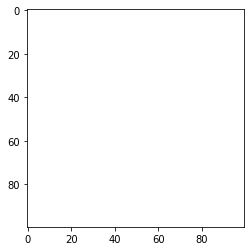

In [3]:
def blanche(n):
    #creation d’un tableau de zeros
    M=np.zeros((n,n,3),dtype=np.uint8)
    M[:,:]=255# OU [255,255,255]
    ##OU encore par la programmation
    #for i in range(n):
    #    for j in range(n):
    #        M[i,j]=[255,255,255]
    ##transformer le tableau en image
    plt.imshow(M)
    #plt.axis("off")
    #visualiser l’image
    plt.show()
blanche(100)

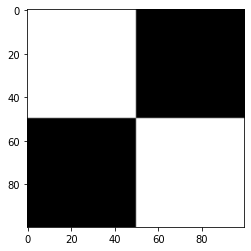

In [4]:
# Q3.
def block1(n):
    M=np.zeros((n,n,3),dtype=np.uint8)
    M[:n//2,:n//2]=[255,255,255] # zone 1
    M[n//2:,n//2:]=[255,255,255] # zone2
    plt.imshow(M)
    plt.show()
block1(100)

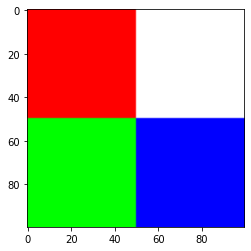

In [5]:
# Q4.
def block2(n):
    M=np.zeros((n,n,3),dtype=np.uint8)
    M[:n//2,:n//2]=[255,0,0]
    M[:n//2,n//2:]=[255,255,255]
    M[n//2:,:n//2]=[0,255,0]
    M[n//2:,n//2:]=[0,0,255]
    plt.imshow(M)
    plt.show()
block2(100)

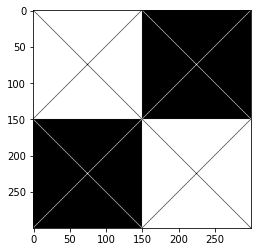

In [6]:
# Q5. 
def block3(n):
    M=np.zeros((n,n,3),dtype=np.uint8)
    M[:n//2,:n//2]=255
    M[n//2:,n//2:]=255
    for i in range(n):
        M[i,i]=[0,0,0]
        M[i,n-i-1]=[255,255,255]
    for i in range(n//2):
        M[i,i+n//2]=255
        M[i+n//2,i]=255
        M[i,n//2-i-1]=0
        M[n//2+i,n-i-1]=0
    plt.imshow(M)
    plt.show()
block3(300)

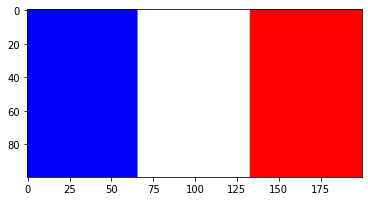

In [7]:
# Q6. 1.
def france(n,p):
    M=np.zeros((n,p,3),dtype=np.uint8)
    M[:,:]=255
    rouge=[255,0,0]
    bleu=[0,0,255]
    M[:,:p//3]=bleu
    M[:,(2*p)//3:]=rouge
    plt.imshow(M)
    plt.show()
france(100,200)

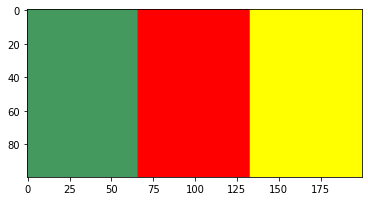

In [8]:
# Q6. 2.
def cameroun(n,p):
    M=np.zeros((n,p,3),dtype=np.uint8)
    vert=[68,153,94]
    rouge=[255,0,0]
    jaune=[255,255,0]
    M[:,:p//3]=vert
    M[:,p//3:(2*p)//3]=rouge
    M[:,(2*p)//3:]=jaune
    plt.imshow(M)
    plt.show()
cameroun(100,200) #Appel de la fonction

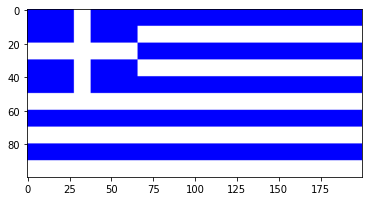

In [9]:
# Q6. 3.
def grece(n, p):
    M=np.zeros((n,p,3),dtype=np.uint8)
    M[:,:]=255
    bleu,blanc=[0,0,255],[255,255,255]
    # bandes
    nbr_bandes = n//10 # nbre de bandes
    l = 10 #soit L la largeur de la bande
    for i in range(0,nbr_bandes,2):
        M[i*l:(i+1)*l,:]=bleu
    # croix
    M[:n//2,:p//3]=bleu
    M[(n//4 -5):(n//4 +5),:p//3]=blanc
    M[:n//2,(p//6 -5):(p//6 +5)]=blanc
    plt.imshow(M)
    plt.show()
grece(100, 200) #Appel de la fonction

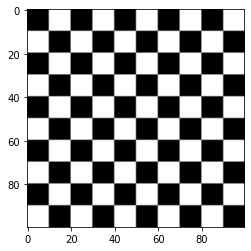

In [10]:
# Q6. 4.
import math as m
def damier(n, p):
    M=np.zeros((n,n,3),dtype=np.uint8)
    nbr_bandes=int(m.sqrt(p)) #nombre de bandes
    l=10 #largeur de chaque bande
    for i in range(nbr_bandes):
        for j in range(nbr_bandes):
            if (i+j)%2!=0:
                M[i*l:(i+1)*l, j*l:(j+1)*l]=[255,255,255]
    plt.imshow(M)
    plt.show()
damier(100, 100) #Appel de la fonction dans le script

# Exercice 2 : Superposition d’images

**Téléchargement des images :**

In [11]:
# panda.png
!wget https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/td1/figures/panda.png
# lena.png
!wget https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/td1/figures/lena.png


--2021-09-24 16:49:08--  https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/td1/figures/panda.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83062 (81K) [image/png]
Saving to: ‘panda.png.1’

panda.png.1         100%[===================>]  81.12K  --.-KB/s    in 0.001s  

2021-09-24 16:49:08 (54.7 MB/s) - ‘panda.png.1’ saved [83062/83062]

--2021-09-24 16:49:08--  https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/td1/figures/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

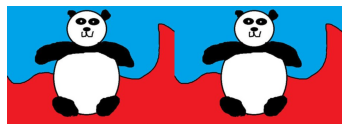

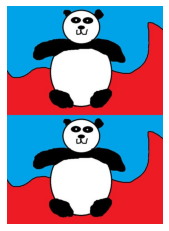

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Q1. Microsof Paint
# Q2. 1/ version numpy
def superposeH_v1():
    M=plt.imread('panda.png')
    M = (M*255).astype(np.uint8)
    T=np.append(M,M,axis=1)
    plt.imsave("superposer_h.png",T)
    plt.imshow(T)
    plt.axis("off")
    plt.show()
superposeH_v1()

def superposeV_v1():
    M=plt.imread('panda.png')
    M = (M*255).astype(np.uint8)
    T=np.append(M,M,axis=0)
    plt.imsave("superposer_v.png",T)
    plt.imshow(T)
    plt.axis("off")
    plt.show()
superposeV_v1()


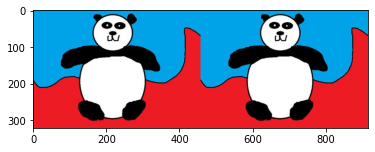

In [13]:
# Q2. 1/ version programmation
def superposeH_v2():
    M=plt.imread('panda.png')
    M = (M*255).astype(np.uint8)
    n,p,k = M.shape
    T=np.ndarray((n,2*p,k),dtype=np.uint8)
    for i in range(p):
        T[:,i] = M[:,i]
        T[:,i+p] = M[:,i]
    plt.imshow(T)
    plt.show()
superposeH_v2()

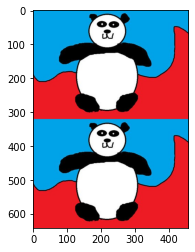

In [14]:
def superposeV_v2():
    M=plt.imread('panda.png')
    M = (M*255).astype(np.uint8)
    n,p,k = M.shape
    T=np.ndarray((2*n,p,k),dtype=np.uint8)
    for i in range(n):
        T[i,:] = M[i,:]
        T[i+n,:] = M[i,:]
    plt.imshow(T)
    plt.show()
superposeV_v2()

# Exercice 3 : Manipulations des couleurs

In [15]:
# Q1.
import numpy as np
import matplotlib.pyplot as plt
import imageio
M=imageio.imread('lena.png')
print(type(M),M.dtype,M.shape)

<class 'imageio.core.util.Array'> uint8 (512, 512, 3)


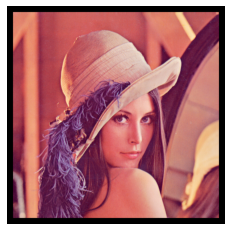

In [16]:
# Q2.
def cadre(M):
    """
    Ajouter un cadre de largeur 15 pixels
    """
    n, p, k = M.shape
    l = 15  # largeur du cadre
    T = np.zeros((n+2*l, p+2*l, k), dtype = np.uint8)
    for i in range(n):
        for j in range(p):
            T[i+15, j+15] = M[i, j]
    plt.imshow(T)
    plt.axis("off")
cadre(M)

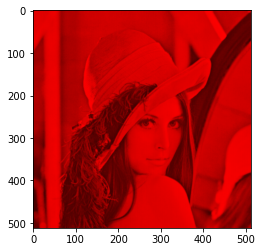

In [17]:
# Q3. Extraction des couches couleurs
# 1/
def composante_rouge(M):
    """
    extrait et affiche la composante rouge de l’image
    """
    n, p, k = M.shape
    T = np.copy(M)
    for i in range(n):
        for j in range(p):
            T[i,j]=[M[i,j][0],0,0]
    plt.imshow(T)

composante_rouge(M)

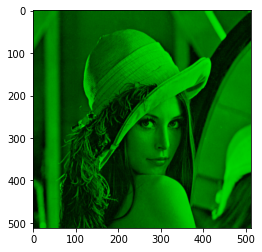

In [18]:
# 2/
def composante_verte(M):
    """
    extrait et affiche la composante verte de l’image
    """
    n, p, k = M.shape
    T = np.copy(M)
    for i in range(n):
        for j in range(p):
            T[i,j]=[0,M[i,j][1],0]
    plt.imshow(T)

composante_verte(M)

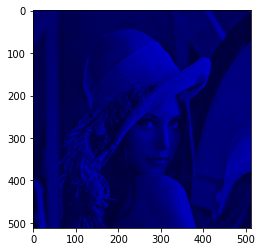

In [19]:
# 2/
def composante_bleue(M):
    """
    extrait et affiche la composante bleue de l’image
    """
    n, p, k = M.shape
    T = np.copy(M)
    for i in range(n):
        for j in range(p):
            T[i,j]=[0,0,M[i,j][2]]
    plt.imshow(T)

composante_bleue(M)

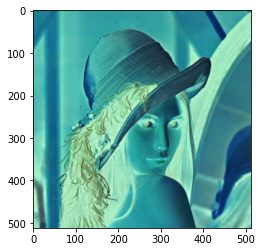

In [20]:
# version directe avec numpy
def negatif_v1(M):
    """
    retourne le négatif de l'image
    """
    T = np.uint8(M*255)
    plt.imshow(T)
negatif_v1(M)

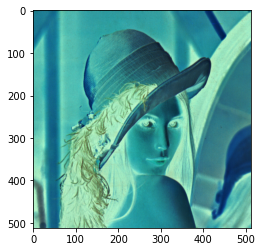

In [21]:
# version avec la programmation
def negatif_v2(M):
    """
    retourne le négatif de l'image
    """
    n, p, k = M.shape
    T = np.copy(M)
    for i in range(n):
        for j in range(p):
            T[i, j] = [255-M[i,j][0],255-M[i,j][1], 255-M[i,j][2]]
    plt.imshow(T)
negatif_v2(M)

**Exemple de solution dans une figure en vue de grille**

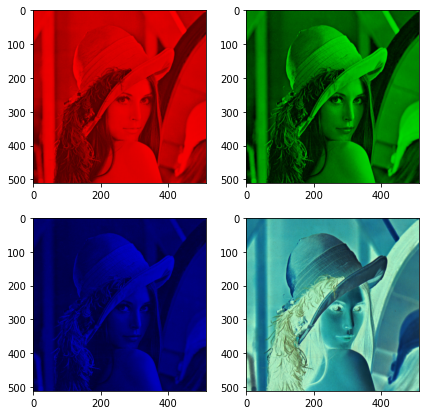

In [22]:
import numpy as np
import matplotlib.pyplot as plt
M=plt.imread('lena.png')
CR=np.copy(M)
CV=np.copy(M)
CB=np.copy(M)
Neg=np.copy(M)
n,p,k=M.shape
for i in range(n):
    for j in range(p):
        CR[i,j]=[M[i,j][0],0,0]
        CV[i,j]=[0,M[i,j][1],0]
        CB[i,j]=[0,0,M[i,j][2]]
        Neg[i,j]=[1-M[i,j][0],1-M[i,j][1],1-M[i,j][2]]
# Plot figure en vue de grille
plt.figure(figsize = [7, 7])
plt.subplot(2,2,1)
plt.imshow(CR)
plt.subplot(2,2,2)
plt.imshow(CV)
plt.subplot(2,2,3)
plt.imshow(CB)
plt.subplot(2,2,4)
plt.imshow(Neg)
plt.show()

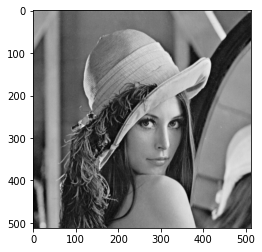

array([[162., 162., 162., ..., 169., 154., 128.],
       [162., 162., 162., ..., 169., 154., 128.],
       [162., 162., 162., ..., 169., 154., 128.],
       ...,
       [ 42.,  42.,  49., ..., 104., 100.,  98.],
       [ 43.,  43.,  54., ..., 103., 105., 107.],
       [ 43.,  43.,  54., ..., 103., 105., 107.]])

In [29]:
# Q4. Niveau de gris (1.)
import math as m
import imageio
M=imageio.imread('lena.png')
def niveau_gris(M):
    n,p,c=M.shape
    G=np.ndarray((n,p))
    for i in range(n):
        for j in range(n):
            x=m.floor(M[i,j][0]*0.299 + M[i,j][1]*0.587 + M[i,j][2]*0.114)
            G[i,j]=x

    plt.imshow(G, cmap = 'gray')
    plt.show()
    return G
niveau_gris(M)

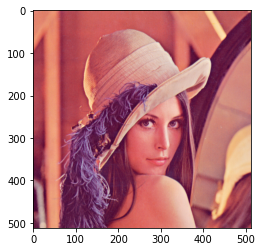

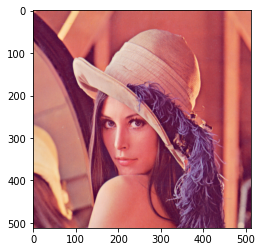

array([[[200,  99,  90],
        [221, 130, 110],
        [230, 148, 122],
        ...,
        [223, 137, 133],
        [226, 137, 125],
        [226, 137, 125]],

       [[200,  99,  90],
        [221, 130, 110],
        [230, 148, 122],
        ...,
        [223, 137, 133],
        [226, 137, 125],
        [226, 137, 125]],

       [[200,  99,  90],
        [221, 130, 110],
        [230, 148, 122],
        ...,
        [223, 137, 133],
        [226, 137, 125],
        [226, 137, 125]],

       ...,

       [[177,  62,  79],
        [172,  68,  76],
        [173,  73,  84],
        ...,
        [ 92,  27,  58],
        [ 84,  18,  60],
        [ 84,  18,  60]],

       [[185,  74,  81],
        [181,  71,  81],
        [179,  70,  79],
        ...,
        [ 96,  32,  62],
        [ 82,  22,  57],
        [ 82,  22,  57]],

       [[185,  74,  81],
        [181,  71,  81],
        [179,  70,  79],
        ...,
        [ 96,  32,  62],
        [ 82,  22,  57],
        [ 82,  22,  57]]

In [30]:
# Q4. Niveau de gris (2.)
def symetrie(M):
    n,p,k=M.shape
    S=np.copy(M)
    for i in range(p):
        S[:,i]=M[:,p-i-1]
    plt.imshow(M)
    plt.show()
    plt.imshow(S)
    plt.show()
    return S
symetrie(M)

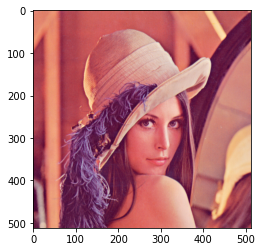

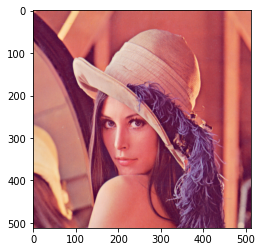

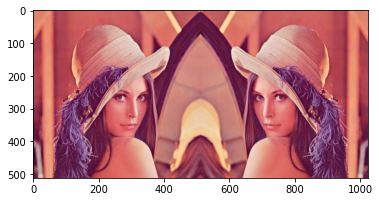

In [31]:
def mirroir(M):
    n,p,k=M.shape
    S=symetrie(M)
    M=np.append(M,S,axis=1)
    plt.imshow(M)
    plt.show()
mirroir(M)


# Exercice 4 : Pixellisation

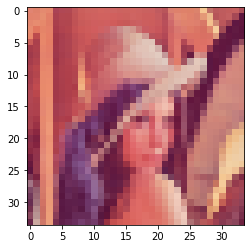

In [33]:
import matplotlib.pyplot as plt
import numpy as np

M=plt.imread('lena.png')
M=M*255
M=np.uint8(M)
a,b,c=M.shape
def pixelisation(k):
    N=np.zeros((a//k,b//k,3),dtype=np.uint8)
    for p in range (0,a//k):
        for l in range(0,b//k):
            s1,s2,s3=0,0,0
            for i in range (k):
                for j in range(k):
                    s1+=M[p*k+i,l*k+j][0]
                    s2+=M[p*k+i,l*k+j][1]
                    s3+=M[p*k+i,l*k+j][2]
            N[p,l]=[int(s1/(k**2)),int(s2/(k**2)),int(s3/(k**2))]
    plt.imshow(N)
    plt.show()
pixelisation(15)